In [1]:
# Useful imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from constants import *
from utils.publication_functions import beautify_data_column_name
from sklearn.cluster import KMeans
from flows.specific.custom_flow import CustomFlow

# Data sources
from data_sources.specific.coca import Coca
from data_sources.specific.gold_export import GoldExport
from data_sources.specific.gold_stock_price import GoldStockPrice
from data_sources.specific.malaria_cases import Malaria
from data_sources.specific.mock_malaria_cases import MockMalaria
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.temperature_max import TemperatureMax
from data_sources.specific.temperature_min import TemperatureMin
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.precipitation_average import PrecipitationAverage
from data_sources.specific.precipitation_total import PrecipitationTotal
from data_sources.specific.deforestation_average import DeforestationAverage
from data_sources.specific.deforestation_total import DeforestationTotal
from data_sources.specific.fb_mobility import FBMobility

# Embedders
from embedders.specific.identity_embedder import IdentityEmbbeder
from embedders.specific.linear_regression_coefficient_embedder import LinearRegressionCoefficientEmbedder
from embedders.specific.mobility_to_distance_embedder import MobilityToDistanceEmbeder
from embedders.specific.mobility_to_similarity_embedder import MobilityToSimilarityEmbeder
from embedders.specific.aggregation_embedder import AggregationEmbedder

# Clusteres
from clusterers.specific.identity_clusterer import IdentityClusterer
from clusterers.specific.quantile_clusterer import QuantileClusterer
from clusterers.specific.sklearn_vector_clusterer import SklearnVectorClusterer
from clusterers.specific.two_tier_dbscan_clusterer import TwoTierDBSCANClusterer
from clusterers.specific.similarity_community_clusterer import SimilarityCommunityClusterer

# Geographies
from geography.specific.colombian_municipalities import ColombianMunicipalities
from geography.specific.choco_municipalities import ChocoMunicipalities
from geography.specific.colombia_grid import ColombianGrid
from geography.specific.colombia_rivers import ColombianRivers
from geography.general.geography_from_flow_output import GeographyFromFlowOutput
from geography.specific.colombia_indg_com import ColombianIndgCom
from geography.specific.colombia_indg_terr import ColombianIndgTerr

# Flows
from flows.specific.custom_flow import  CustomFlow

/Users/andreaparra/Virtual-Envs/malaria_pl/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
fuentes_incluidas = [GoldExport, Malaria]
target_col = 'malaria_num_cases_sum'


In [3]:
flow = CustomFlow(ID = 'basic_analysis',
                    name = "Basic Analysis",
                    time_resolution = YEAR,
                    geography = ChocoMunicipalities(),
                    vector_data_sources=fuentes_incluidas,
                    matrix_data_sources=[],
                    # embedder=IdentityEmbbeder(),
                    embedder=LinearRegressionCoefficientEmbedder(target_col=target_col),
                    clusterer=SklearnVectorClusterer(ID="kmeans", name="K-Means", sklearn_clusterer= KMeans(n_clusters=5))
                    # clusterer=IdentityClusterer()
                    )

In [4]:
flow.initial_geometry = flow.geography
flow.initial_geometry.build_geometry()

,ID,dep_name,muni_name,depto_id,geometry
0,27660,Choco,San Jose Del Palmar,27,"POLYGON ((-76.09368 5.01559, -76.09359 5.01558..."
1,27001,Choco,Quibdo,27,"POLYGON ((-76.98325 6.03191, -76.98319 6.03185..."
2,27006,Choco,Acandi,27,"POLYGON ((-77.34606 8.64611, -77.34321 8.64744..."
3,27025,Choco,Alto Baudo (Pie De Pato),27,"POLYGON ((-77.11703 6.04912, -77.11699 6.04904..."
4,27050,Choco,Atrato (Yuto),27,"POLYGON ((-76.55342 5.55090, -76.55611 5.54723..."
5,27073,Choco,Bagado,27,"POLYGON ((-76.08386 5.66043, -76.07197 5.63936..."
6,27075,Choco,Bahia Solano (Mutis),27,"POLYGON ((-77.40060 6.62606, -77.40337 6.62799..."
7,27077,Choco,Bajo Baudo (Pizarro),27,"POLYGON ((-77.37920 5.54984, -77.37773 5.54608..."
8,27099,Choco,Bojaya (Bellavista),27,"POLYGON ((-76.98147 6.86386, -76.97494 6.85416..."
9,27135,Choco,El Canton Del San Pablo (Managru),27,"POLYGON ((-76.85009 5.48202, -76.84853 5.48167..."


In [5]:
# Loads Data
# ----------------------
flow.df_vector, flow.df_matrix = flow.loadData(flow.initial_geometry)
flow.data_loaded = True

Loads Vector Data
Found 2 elements
   Extracts 1 of 2: Gold Exports (gold_exports) 
   Loads Data


TypeError: only list-like objects are allowed to be passed to isin(), you passed a [NoneType]

In [11]:
flow.df_vector

,ID,date,gold_exports_grams_sum,malaria_num_cases_sum
0,99624,2006-12-31,NaN,4.0
1,54051,2006-12-31,NaN,0.0
2,54099,2006-12-31,NaN,3.0
3,54109,2006-12-31,NaN,0.0
4,54125,2006-12-31,NaN,0.0
...,...,...,...,...
17947,19075,2021-12-31,0.0,NaN
17948,5809,2021-12-31,0.0,NaN
17949,54377,2021-12-31,0.0,NaN
17950,8296,2021-12-31,0.0,NaN


In [15]:
# Embbeds Data
# ----------------------
flow.embeddData()
flow.data_embedded = True

flow.df_embedded_vector

Found 1 embedders
   Linear Regression Coefficient Embeder


,ID,gold_exports_grams_sum
0,68081,0.001634
1,68051,0.000000
2,68077,0.000000
3,68092,0.000000
4,68020,0.000000
...,...,...
1117,44378,0.000000
1118,41378,-0.002452
1119,25426,0.000000
1120,5318,0.847489


In [7]:
# Clusters Data
# ----------------------
flow.clusterData()
flow.data_clustered = True
flow.clustered_ids

,ID,cluster_id
0,68081,0
1,68051,0
2,68077,0
3,68092,0
4,68020,0
...,...,...
1117,44378,0
1118,41378,0
1119,25426,0
1120,5318,1


In [8]:
# Builds final geography
# ----------------------
flow.buildFinalGeography()

TypeError: 'ColombianMunicipalities' object is not subscriptable

In [9]:
flow.final_geometry

<AxesSubplot:>

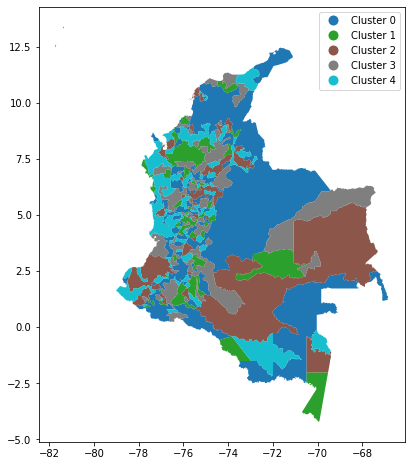

In [30]:
flow.final_geometry[CLUSTER_ID] = flow.final_geometry[ID].apply(lambda i : f"Cluster {i}")
flow.final_geometry.plot(column = CLUSTER_ID, figsize = (8,8), legend=True)

In [32]:
df_coeffs = flow.clustered_ids.merge(flow.df_embedded_vector, on="ID").groupby("cluster_id")["gold_exports_grams_sum"].mean().reset_index()
df_coeffs.head()

,cluster_id,gold_exports_grams_sum
0,0,0.001286
1,1,0.687766
2,2,-0.495808
3,3,0.301286
4,4,-0.221265


In [43]:
ids_1 = flow.clustered_ids[flow.clustered_ids["cluster_id"] == 4]["ID"].to_list()
[x if "27" in str(x) else "" for x in ids_1]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 52786,
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 73270,
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 27025,
 27425,
 '',
 27491,
 '',
 27615,
 '',
 27099,
 '',
 '',
 '',
 27077,
 27361,
 '',
 '',
 '',
 '',
 27250,
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 27745,
 '',
 27800,
 '',
 44279]